In [1]:
# loand Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
# Load the dataset file path)
df = pd.read_csv('data/sierraleone-bumbuna.csv')
print(df)

               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  WSgust  \
0       2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.1  0.0     0.0   
1       2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
2       2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
3       2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
4       2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
...                  ...  ...  ...  ...   ...   ...   ...    ...  ...     ...   
525595  2022-10-29 23:56 -1.6 -0.1 -2.9   0.0   0.0  24.0  100.0  0.0     0.0   
525596  2022-10-29 23:57 -1.7 -0.1 -3.0   0.0   0.0  24.0  100.0  0.0     0.0   
525597  2022-10-29 23:58 -1.7 -0.1 -3.1   0.0   0.0  24.0  100.0  0.0     0.0   
525598  2022-10-29 23:59 -1.7 -0.2 -3.3   0.0   0.0  23.9  100.0  0.0     0.0   
525599  2022-10-30 00:00 -1.7 -0.1 -3.4   0.0   0.0  23.9  100.0  0.0     0.0   

        WSstdev   WD  WDstd

In [ ]:
# Shape pf Datasets
df.shape

(525600, 19)

In [ ]:
# Dispaly the concise summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [ ]:
# checking for missing values
df.isna().sum()

time                        0
dhi_pyr                  1205
ghi_pyr_1                  26
ghi_pyr_2                  26
air_temperature            26
relative_humidity          26
barometric_pressure        26
precipitation              26
wind_speed                 26
wind_from_direction        26
gti_clean                  26
gti_soil                   26
sensor_cleaning            26
comments               548875
dtype: int64

In [ ]:
# List of columns to check
columns_to_check = ['GHI', 'DNI', 'DHI']

# Find rows with negative values in any of these columns
negative_values = df[(df['GHI'] < 0) | (df['DNI'] < 0) | (df['DHI'] < 0)]
print(negative_values)

# Print results
if negative_values.empty:
    print("No negative values found in GHI, DNI, or DHI.")
else:
    print(f"Rows with negative values in GHI, DNI, or DHI:\n{negative_values}")

               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  WSgust  \
0       2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.1  0.0     0.0   
1       2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
2       2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
3       2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
4       2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
...                  ...  ...  ...  ...   ...   ...   ...    ...  ...     ...   
525595  2022-10-29 23:56 -1.6 -0.1 -2.9   0.0   0.0  24.0  100.0  0.0     0.0   
525596  2022-10-29 23:57 -1.7 -0.1 -3.0   0.0   0.0  24.0  100.0  0.0     0.0   
525597  2022-10-29 23:58 -1.7 -0.1 -3.1   0.0   0.0  24.0  100.0  0.0     0.0   
525598  2022-10-29 23:59 -1.7 -0.2 -3.3   0.0   0.0  23.9  100.0  0.0     0.0   
525599  2022-10-30 00:00 -1.7 -0.1 -3.4   0.0   0.0  23.9  100.0  0.0     0.0   

        WSstdev   WD  WDstd

In [ ]:
for col in columns_to_check:
    count_negatives = (df[col] < 0).sum()
    print(f"Number of negative values in {col}: {count_negatives}")

Number of negative values in GHI: 261135
Number of negative values in DNI: 266352
Number of negative values in DHI: 263128


In [ ]:
# replace Negative values with 'nan'
for col in columns_to_check:
    df.loc[df[col] < 0, col] = np.nan

In [ ]:
# Fll those nan with the mean removing affects our analysis
for col in columns_to_check:
    df[col].fillna(df[col].mean())  # Replace NaN with mean

In [ ]:
# Columns to check for outliers
columns = ['ModA', 'ModB', 'WS', 'WSgust']

# Calculate Z-scores for the specified columns
z_scores = df[columns].apply(zscore)

# Identify rows with outliers (Z-score > 3 or < -3)
outliers = df[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]

# Display rows with outliers
if not outliers.empty:
    print(f"Outliers detected in the following rows:\n{outliers}")
else:
    print("No significant outliers detected.")

Outliers detected in the following rows:
               Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
662     2021-10-30 11:03  1071.0  616.0  539.1  1142.0  1116.0  26.4  82.5   
663     2021-10-30 11:04  1119.0  673.5  538.4  1193.0  1167.0  26.3  83.1   
670     2021-10-30 11:11  1092.0  667.1  507.6  1163.0  1137.0  27.0  83.4   
671     2021-10-30 11:12  1154.0  755.7  491.3  1237.0  1208.0  27.0  82.4   
672     2021-10-30 11:13  1063.0  665.2  478.0  1132.0  1105.0  27.1  80.1   
...                  ...     ...    ...    ...     ...     ...   ...   ...   
522184  2022-10-27 15:05   167.2    NaN  165.1   167.6   160.9  30.4  68.3   
522185  2022-10-27 15:06   163.4    NaN  161.0   165.7   159.2  30.2  67.7   
522194  2022-10-27 15:15   183.5    0.3  181.6   173.7   168.7  29.3  70.2   
523792  2022-10-28 17:53    31.3    NaN   30.2    34.3    32.3  28.4  79.5   
523794  2022-10-28 17:55    22.8    NaN   21.4    26.5    25.0  27.9  80.4   

         WS  WSgust  W

In [ ]:
# Remove outliers from the dataset
df2 = df[~((z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1))]

print(f"Data shape after removing outliers: {df_cleaned.shape}")

Data shape after removing outliers: (518970, 20)


# Time Series Analysis

In [ ]:
# Convert Timestamp to datetime
df2.loc[:, 'Timestamp'] = pd.to_datetime(df2['Timestamp'])

# Extract day, month, and year
df2.loc[:, 'Date'] = df2['Timestamp'].dt.date
df2.loc[:, 'Month'] =df2['Timestamp'].dt.to_period('M')
df2.loc[:, 'Year'] = df2['Timestamp'].dt.year

In [ ]:
# Aggregate Data daily
# Daily mean
daily_df2 =df2.groupby('Date')[['GHI', 'DNI', 'DHI', 'Tamb']].mean().reset_index()

# Monthly mean
monthly_df2 = df2.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean().reset_index()

# Yearly mean
yearly_df2 = df2.groupby('Year')[['GHI', 'DNI', 'DHI', 'Tamb']].mean().reset_index()

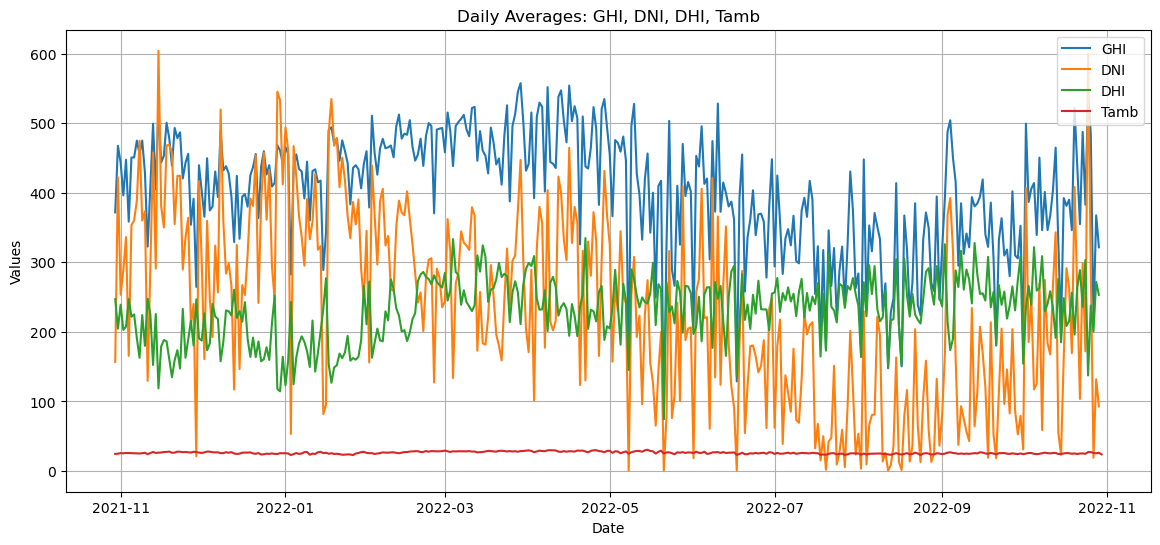

In [ ]:
# Show their daily status 
plt.figure(figsize=(14, 6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(daily_df2['Date'], daily_df2[col], label=col)
plt.title('Daily Averages: GHI, DNI, DHI, Tamb')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

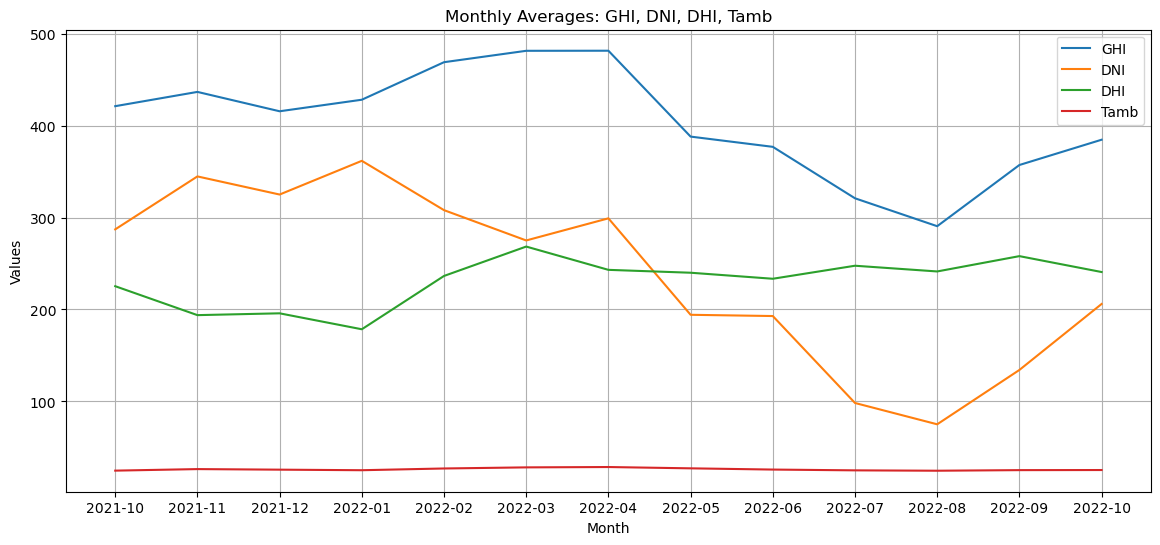

In [ ]:
# Show their monthly status 
plt.figure(figsize=(14, 6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(monthly_df2['Month'].astype(str), monthly_df2[col], label=col)
plt.title('Monthly Averages: GHI, DNI, DHI, Tamb')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

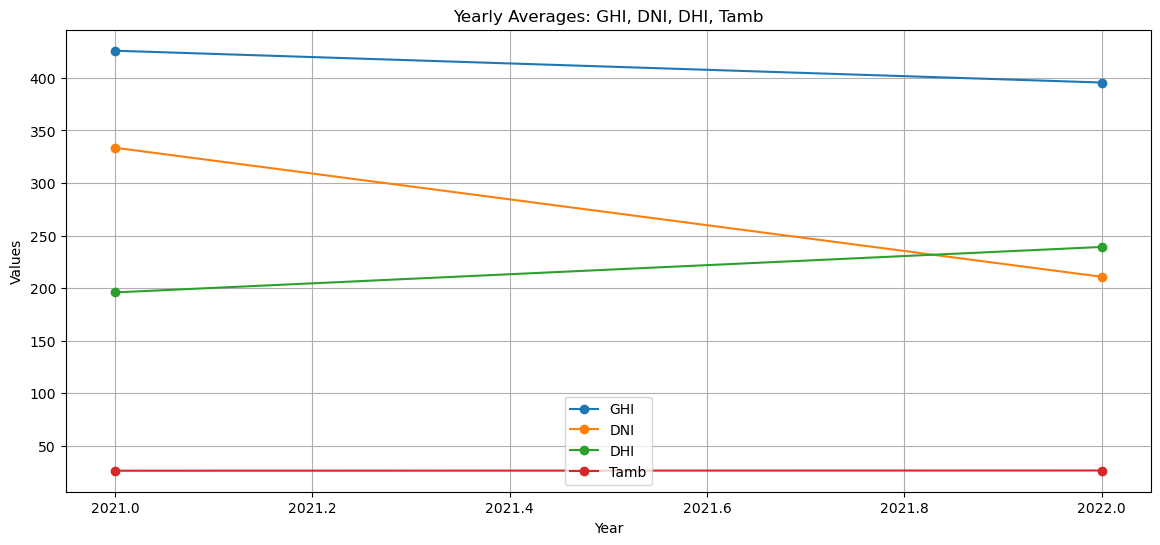

In [ ]:
# Show their yearly status 
plt.figure(figsize=(14, 6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(yearly_df2['Year'], yearly_df2[col], marker='o', label=col)
plt.title('Yearly Averages: GHI, DNI, DHI, Tamb')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Calculate mean ModA and ModB values before and after cleaning
cleaned = df[df['Cleaning'] == 1]
not_cleaned = df2[df2['Cleaning'] == 0]

print("Mean ModA when cleaned:", cleaned['ModA'].mean())
print("Mean ModA when not cleaned:", not_cleaned['ModA'].mean())

# Plot ModA and ModB by cleaning
plt.figure(figsize=(10, 5))
sns.boxplot(x='Cleaning', y='ModA', df=df)
plt.title('Impact of Cleaning on ModA')
plt.show()

Mean ModA when cleaned: 273.30925196850393
Mean ModA when not cleaned: 202.5410720554256


ValueError: Could not interpret input 'Cleaning'

<Figure size 1000x500 with 0 Axes>

# Correlation Analysis

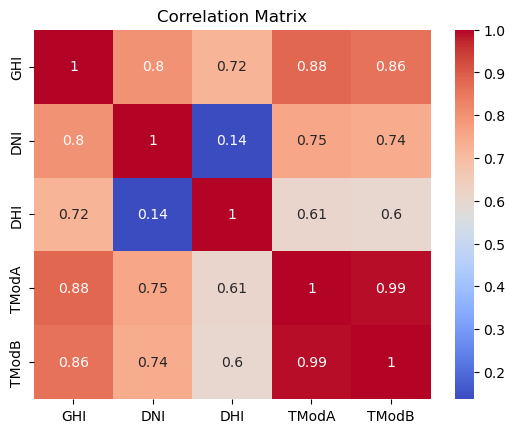

In [ ]:
# Correlation matrix
correlation_matrix = df2[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

C:\Users\Specter\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


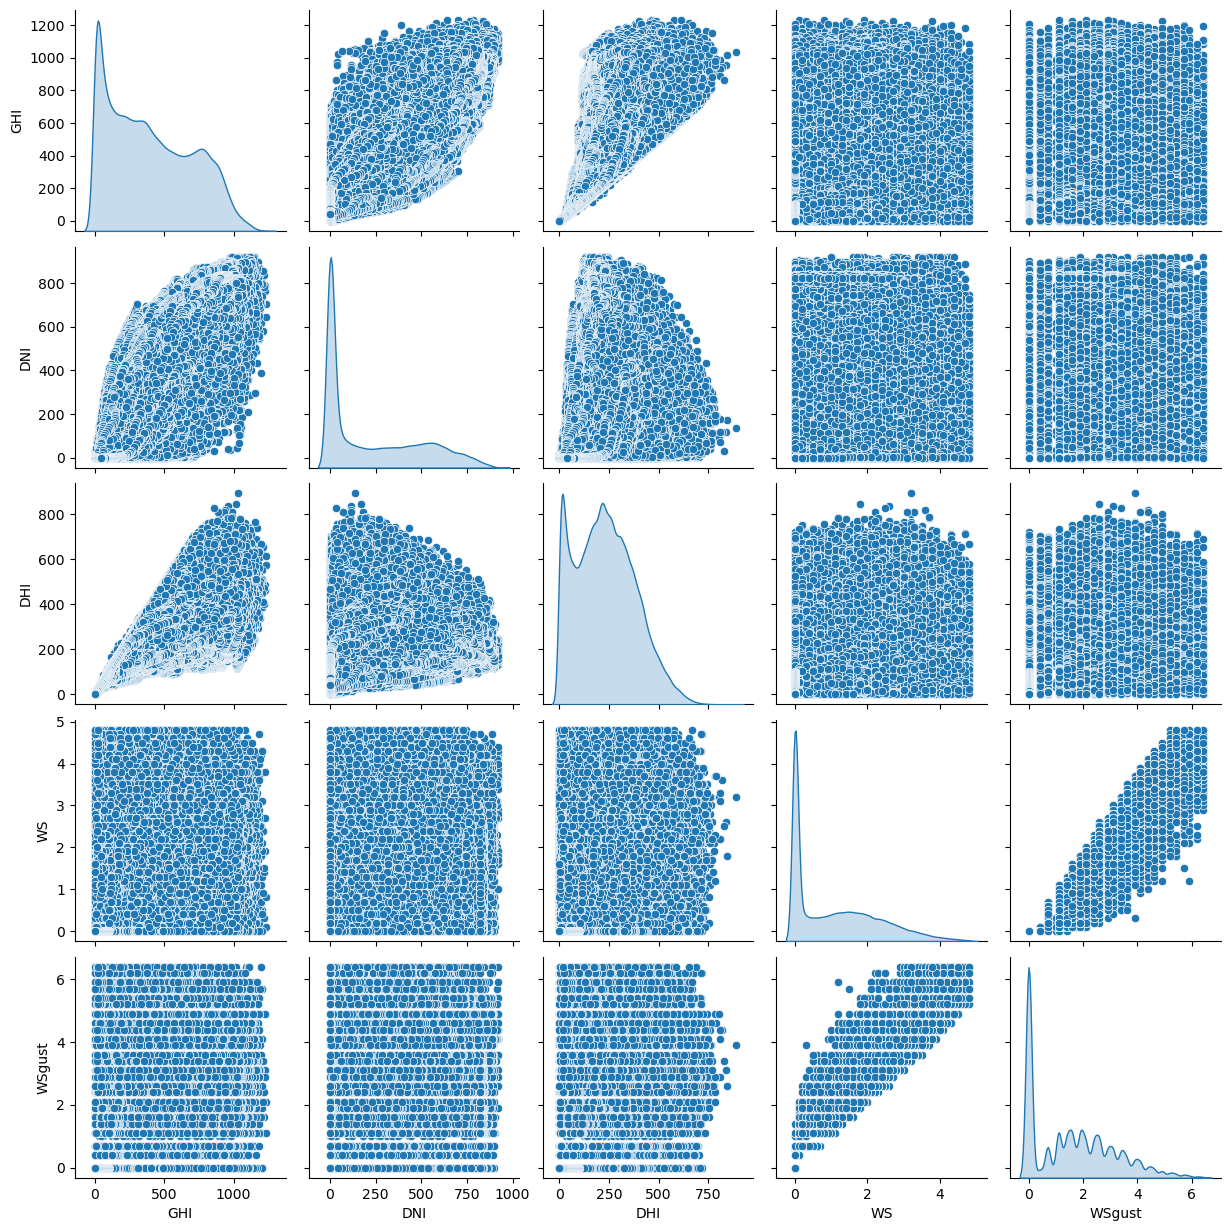

In [ ]:
# Scatter matrix for solar radiation vs wind conditions
sns.pairplot(df2, vars=['GHI', 'DNI', 'DHI', 'WS', 'WSgust'], diag_kind='kde')
plt.show()

# Wind Analysis

In [ ]:
pip install windrose

  Obtaining dependency information for windrose from https://files.pythonhosted.org/packages/fb/5e/c27fbd92d635d5ee4789cb91b82e475a59a0dc86eb8a279e3397d4cc8d54/windrose-1.9.2-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


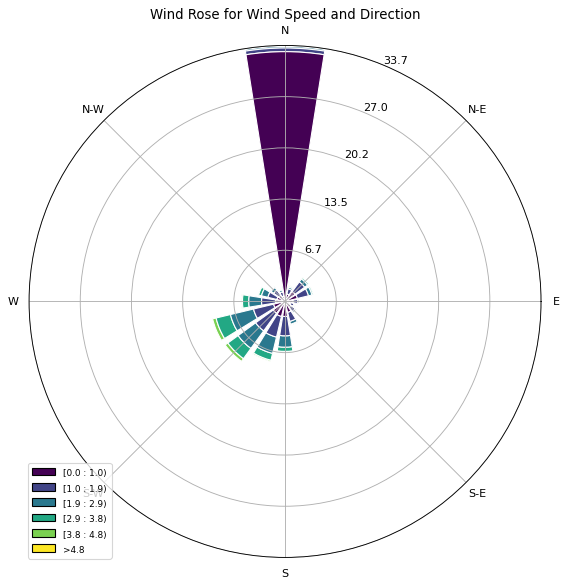

In [ ]:
# Radial bar plot for wind direction
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df2['WD'], df2['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose for Wind Speed and Direction')
plt.show()

# Temperature Analysis


C:\Users\Specter\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


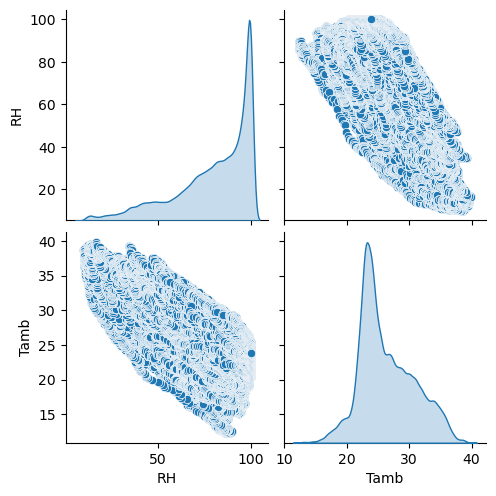

In [ ]:
sns.pairplot(df2, vars=['RH', 'Tamb'], diag_kind='kde')
plt.show()

# Histograms

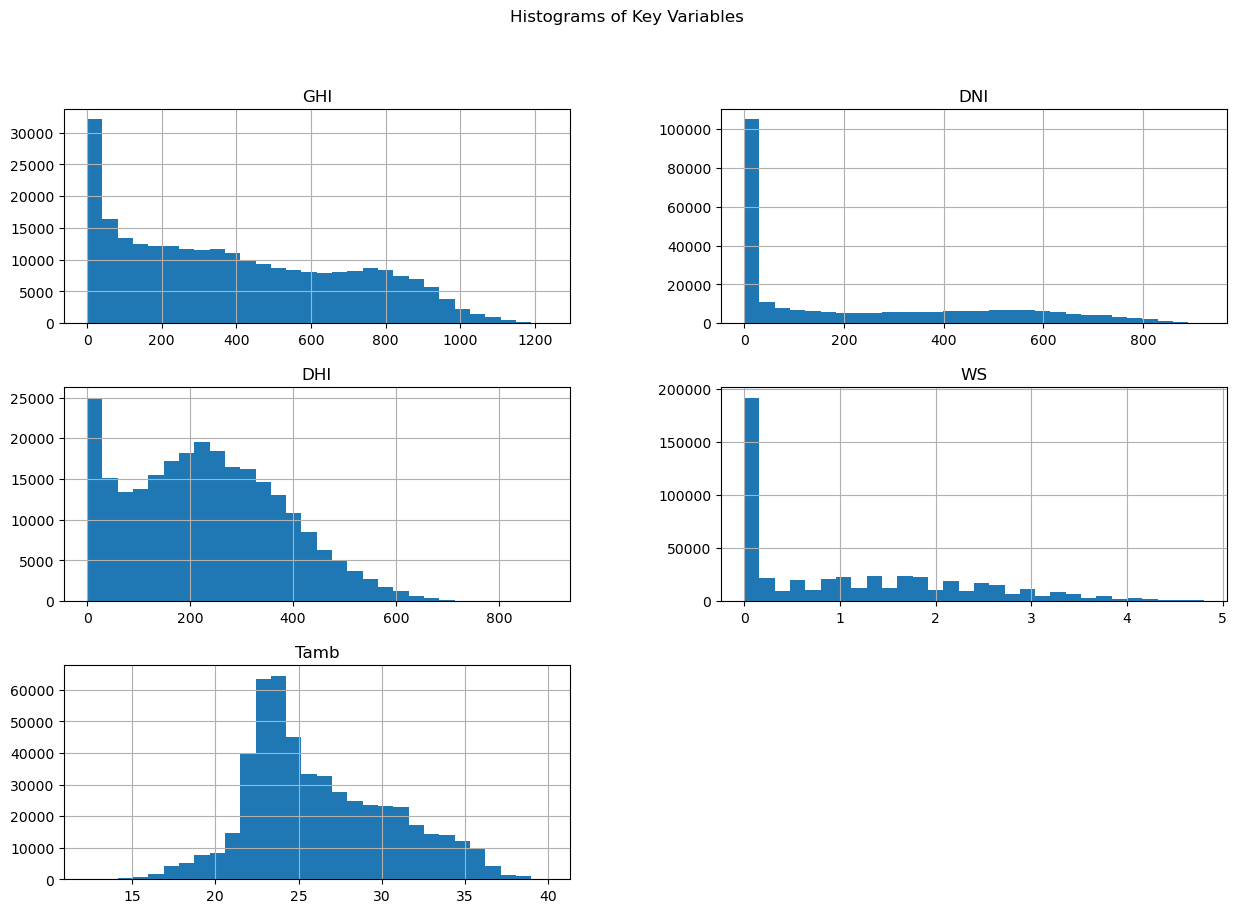

In [ ]:
# Plot histograms for key variables
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
df2[variables].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Key Variables')
plt.show()

# Bubble Charts

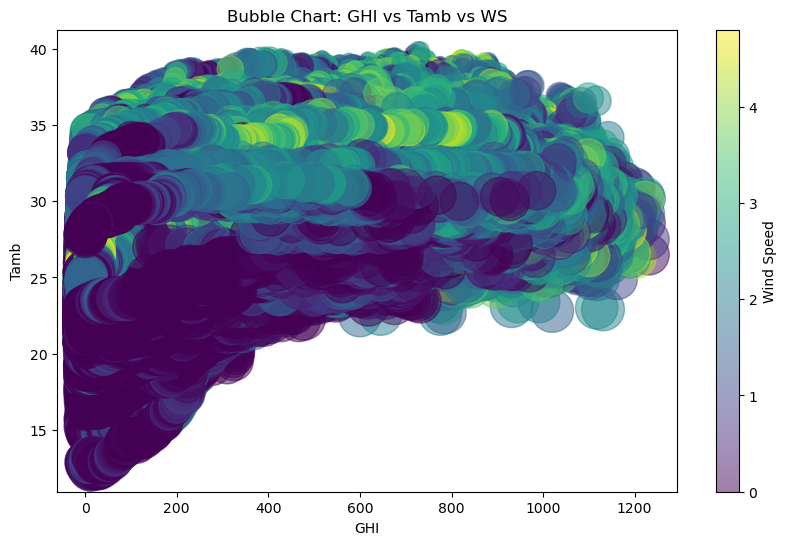

In [ ]:
# Bubble chart: GHI vs Tamb vs WS with bubble size as RH
plt.figure(figsize=(10, 6))
bubble_chart = plt.scatter(df2['GHI'], df2['Tamb'], s=df2['RH']*10, c=df2['WS'], alpha=0.5, cmap='viridis')
plt.colorbar(bubble_chart, label='Wind Speed')
plt.title('Bubble Chart: GHI vs Tamb vs WS')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.show()